# Structured Data Project 2 - Predicting the Sale Price of Bulldozers (Regression) 

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

**Problem Definition:** Using sales from past to predict sales in the future.

**End-to-end Machine Learning Iterative Pipeline:**
1. What problem are we trying to solve?
2. What data do we have?
3. What defines success?
4. What features should we model?
5. What kind of model should we use?
6. What have we tried/what else can we try?

## 1. Problem Definition
> How well can we predict the future sale price of a bulldozer, given it's characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data
The data is downloaded from Kaggle Bluebook for Bulldozers Competition. <br>
<a href="https://www.kaggle.com/c/bluebook-for-bulldozers"> Blue Book for Bulldozers </a> <br>

### 3 main datasets:
- **Train.csv** is the training set, which contains data through the end of 2011.
- **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
- **Test.csv** is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
- RMSLE: Root of the MSLE?

For more on the evaluation of this project, check: 
<a href="https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation"> https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation </a>

**Note:** THe goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimizes RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets. <br> 
<a href="Data/bluebook-for-bulldozers/Data Dictionary.xlsx"> Data Dictionary </a>

In [1]:
# Importing Datasets: 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 

# Import the Data

In [2]:
# Import training and validation sets: 
df = pd.read_csv("Data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

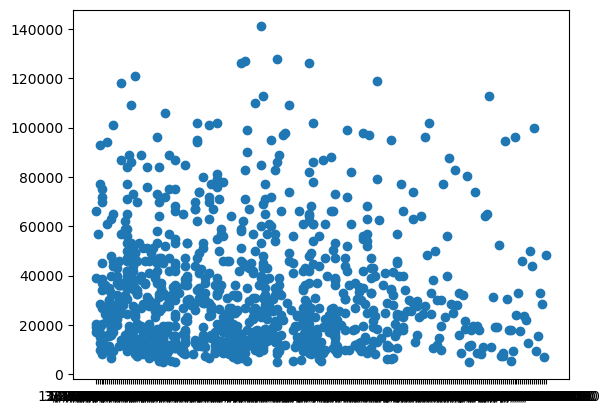

In [5]:
fig, ax = plt.subplots()

ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000])

<Axes: ylabel='Frequency'>

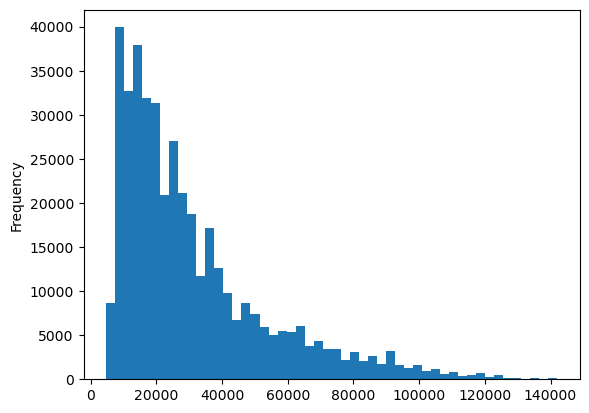

In [6]:
df.SalePrice.plot.hist(bins=50)

### Parsing Dates

When we work with time series data, we want to enrich the time & data component as much as possible.

We can do that by telling Pandas which of our columns have dates in them - using `parse_dates` parameter.

In [7]:
# Import data again but this time parse dates

df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False, parse_dates=['saledate'])

In [8]:
df.saledate.dtype

dtype('<M8[ns]')

In [9]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [10]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [11]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

When working with time series data, it's a good idea to sort it by date.

In [12]:
# Sort DataFrame in date order:
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20) 

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original dataframe: 

We make a copy of the original dataframe so when we manipulat the copy, we've still got our original data.

In [13]:
# Make a copy
df_tmp = df.copy()

In [14]:
df_tmp.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

# Feature Engineering

### Add Datetime parameters for `saledate` column 

In [15]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear

In [16]:
df_tmp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int32

In [17]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [18]:
# Now we've enriched our DataFrame with date time features, we can remove 'saledate'.

df_tmp = df_tmp.drop("saledate", axis=1)

In [19]:
# Check the values of different columns
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modelling

We've done enough EDA (we could always do more), but let's start to do some **model-driven EDA.**

In [20]:
df_tmp["UsageBand"].dtype

dtype('O')

In [21]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convert Strings to Categories

One way we can turn all of our data into numbers is by converting them into Pandas categories.

In [22]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

False

In [23]:
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [24]:
# If you're wondering what df.items() does, here's an example: 
random_dict = {"key1" : "hello",
               "key2" : 23 }

for key, value in random_dict.items(): 
    print(f"This is a key { key }", f"This is a value { value }")

This is a key key1 This is a value hello
This is a key key2 This is a value 23


In [25]:
# This will turn all of the string values into category values.

for label, content in df_tmp.items(): 
    if pd.api.types.is_string_dtype(content): 
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [26]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

In [27]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [28]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

In [29]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to Pandas Categories, we now have a way to access all of our data in the form of numbers.

But we still have a bunch of missing data.

In [30]:
# Check Missing Data: Get Percentage: 
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save Preprocessed Data

In [31]:
# Export Current Tmp Dataframe

# df_tmp.to_csv("data/bluebook-for-bulldozers/train_tmp.csv", index=False)

In [32]:
# import preprocessed data

df_tmp = pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv", low_memory=False)

In [33]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [34]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill Missing Values

### Fill Numeric Missing Values First: 

In [35]:
for label, content in df_tmp.items(): 
    if pd.api.types.is_numeric_dtype(content): 
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [36]:
df_tmp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [37]:
# Check for which numeric columns have null values.

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content): 
        if pd.isnull(content).sum(): 
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [38]:
# Fill numeric rows with the median. 

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content): 
        if pd.isnull(content).sum(): 
            # Add a binary column which tells us f the data was missing or not.
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median.
            df_tmp[label] = content.fillna(content.median())

Why use the median? *Because the median is more robust than the mean.*

In [39]:
# Demonstrate how median is more robust than mean: 
hundreds = np.full((1000,), 100) 
hundreds_billion = np.append(hundreds, 10000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(100.0, 9990109.89010989, 100.0, 100.0)

In [40]:
# Check if there's any null numeric values: 
for label, content in df_tmp.items(): 
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum(): 
            print(label) 

In [41]:
# Check to see how many examples were missing: 

df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [42]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling And Turning Categorical Variables Into Numbers

In [43]:
# Check for columns which aren't numeric: 
for label, content in df_tmp.items(): 
    if not pd.api.types.is_numeric_dtype(content):
        print(label) 

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [44]:
# Turn Categorical Variables Into Numbers and Fill Missing: 

for label, content in df_tmp.items(): 
    if not pd.api.types.is_numeric_dtype(content): 
        # Add binary column to indicate whether sample had missing value.
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1

"""
Pandas normally adds -1 to categorical variables, 
which is why a plus 1 is necessary to keep the data the same. 
"""

'\nPandas normally adds -1 to categorical variables, \nwhich is why a plus 1 is necessary to keep the data the same. \n'

In [45]:
pd.Categorical(df_tmp['state']).codes+1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [46]:
pd.Categorical(df_tmp['UsageBand']).codes + 1

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [47]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [48]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [49]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Now that all of our data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model!

In [50]:
%%time

from sklearn.ensemble import RandomForestRegressor

# Instantiate Model
model = RandomForestRegressor(n_jobs=-1, random_state=42)

# Fit the model: 
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

CPU times: total: 15min 50s
Wall time: 1min 7s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [51]:
# Score the Model

model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9875468079970562

**Question:** Why doesn't the above metric hold water? (why isn't the metric reliable?)

**Generalization:** The ability for a machine learning model to  perform well on data it has not seen before.

## Splitting Data in Train/Validation Sets

In [52]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [53]:
# Split data into training and validation by Sale Year

df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [54]:
# Split Data into X and y.

X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [55]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

## Building an Evaluation Function

In [56]:
# Create evaluation function (the competition uses RMSLE)
"""
MAE: How much is your prediction from the actual sale price? Essentially the standard deviation
of evaluating the accuracy of Machine Learning Models. 

MSE: Squared version of predicted values and actual values, amplifying larger differences. Use when 
there's larger/more significant gaps in the data. 
"""
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def RMSLE(y_test, y_preds): 
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on few different levels: 
def show_scores(model): 
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE" : mean_absolute_error(y_train, train_preds),
             "Validation MAE" : mean_absolute_error(y_valid, val_preds),
             "Training RMSLE" : RMSLE(y_train, train_preds),
             "Valid RMSLE" : RMSLE(y_valid, val_preds),
             "Training R^2" : r2_score(y_train, train_preds),
             "Validation R^2" : r2_score(y_valid, val_preds)}
    return scores

## Testing our model on a subset (to tune the hyperparameters).

In [57]:
len(X_train)

401125

In [58]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)

In [59]:
model.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)>

In [60]:
%%time 
# Cutting down on the max number of samples each estimate can see improves training time.
model.fit(X_train, y_train) 

CPU times: total: 37.2 s
Wall time: 2.79 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [61]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Validation MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Validation R^2': 0.8320374995090507}

### Hyperparameter Tuning with RandomizedSearchCV

In [62]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Differnet RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1,20,2),
           "max_features" : [0.5, 1, "sqrt", "auto"],
           "max_samples" : [10000]}

# Instantiate RandomizedSearchCV
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, 
                                                    random_state=42),
                                                    param_distributions=rf_grid,
                                                    cv=5,
                                                    n_iter=2,
                                                    verbose=True)

# Fit the RandomizedSearchCV Model! 
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 4.98 s
Wall time: 3.86 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [63]:
# Find the best model hyperparameters 

rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 3}

In [64]:
# Evaluate RandomizedSearchModel 
show_scores(rs_model)

{'Training MAE': 11808.057115094787,
 'Validation MAE': 13527.762309851034,
 'Training RMSLE': 0.5074863209248018,
 'Valid RMSLE': 0.5141107036407143,
 'Training R^2': 0.48745793976650287,
 'Validation R^2': 0.48755073946051875}

### Train a model with the best hyperparameters.

**Note:** These were found after 100 iterations of `RandomizedSearchCV`.

In [65]:
%%time 

# Most ideal hyperparameters: 
ideal_model = RandomForestRegressor(n_estimators=80, 
                                    min_samples_leaf = 19,
                                    min_samples_split = 4,
                                    max_samples = None,
                                    max_features = 0.5,
                                    max_depth = None,
                                    n_jobs=-1,
                                    random_state=42)

# Fit the ideal model: 
ideal_model.fit(X_train, y_train)

CPU times: total: 3min 39s
Wall time: 14.6 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=19,
                      min_samples_split=4, n_estimators=80, n_jobs=-1,
                      random_state=42)

In [66]:
# Scores for ideal model (trained on all the data) 
show_scores(ideal_model)

{'Training MAE': 4392.285526241007,
 'Validation MAE': 6175.732730327103,
 'Training RMSLE': 0.2072456320775223,
 'Valid RMSLE': 0.25103381096095445,
 'Training R^2': 0.9095210540647324,
 'Validation R^2': 0.8697319124174739}

In [67]:
# Scoes on rs_model (only trained on 10,000 examples): 
show_scores(rs_model) 

{'Training MAE': 11808.057115094787,
 'Validation MAE': 13527.762309851034,
 'Training RMSLE': 0.5074863209248018,
 'Valid RMSLE': 0.5141107036407143,
 'Training R^2': 0.48745793976650287,
 'Validation R^2': 0.48755073946051875}

## Make predictions on test data

In [123]:
# Import the test data 

df_test = pd.read_csv("Data/bluebook-for-bulldozers/Test.csv", 
                      low_memory=False, 
                      parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [124]:
# Make predictions on test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [125]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [126]:
df_test.columns, df_test.shape

(Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
        'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
        'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
        'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
        'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
        'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
        'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
        'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
        'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
        'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
        'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
        'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
        'Differential_Type', 'Steering_Controls'],
       dtype='object'),
 (12457, 52))

In [127]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

## Data Preprocessing (getting the test dataset in the same format as our training dataset).

In [128]:
def preprocessData(df): 
    """
    Performs transformations on df and returns transformed df.
    """
    
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear

    df.drop("saledate", axis=1, inplace=True)

    # Fill Numeric Rows With Median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content): 
            if pd.isnull(content).sum(): 
                # Add a binary column which tells us f the data was missing or not.
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median.
                df[label] = content.fillna(content.median())

    # Filled Categorical Missing Data and Turn Categories Into Numbers
    for label, content in df.items(): 
        if not pd.api.types.is_numeric_dtype(content): 
            # Add binary column to indicate whether sample had missing value.
            df[label+"_is_missing"] = pd.isnull(content)
            # Turn categories into numbers and add +1
            df[label] = pd.Categorical(content).codes + 1
            
    return df

In [129]:
# Process the Test Data: 
df_test = preprocessData(df_test) 
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [130]:
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing


In [131]:
# Manually adjust df_test to have auctioneerID_is_missing column 
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally now our test dataframe has the same features as our training dataframe, we can make predictions!

In [135]:
# Make predictions on the test data.

df_test.columns == X_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [136]:
df_test = df_test[X_train.columns]

In [137]:
df_test.columns == X_train.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [138]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [139]:
test_preds = ideal_model.predict(df_test) 

In [140]:
test_preds

array([18434.85891887, 17203.25571698, 50470.56251299, ...,
       12363.0386839 , 16368.8005245 , 23201.13552347])

We've made some predictions but they're not in the same format Kaggle is asking for.

In [149]:
# Formal predictions into the same format Kaggle is after.

df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds['SalesPrice'] = test_preds.round(2)

In [150]:
df_preds

,SalesID,SalesPrice
0,1227829,18434.86
1,1227844,17203.26
2,1227847,50470.56
3,1227848,65355.63
4,1227863,42788.12
...,...,...
12452,6643171,36368.21
12453,6643173,12101.44
12454,6643184,12363.04
12455,6643186,16368.80


In [151]:
# Export prediction data: 

# df_preds.to_csv("Data/bluebook-for-bulldozers/test_predictions.csv", index=False)

## Feature Importance:

In [161]:
# Find Feature Importance of our Best Model: 

ideal_model.feature_importances_

array([2.96684623e-02, 1.79959346e-02, 3.90077060e-02, 1.58289248e-03,
       1.18296706e-03, 2.18346537e-01, 1.66236759e-03, 5.08463577e-04,
       4.92187494e-02, 3.64966990e-02, 6.88197900e-02, 4.03351585e-03,
       1.49887492e-02, 1.66551745e-01, 4.55891940e-02, 2.09990843e-03,
       2.64569142e-03, 3.38892055e-03, 3.31430737e-03, 6.63985591e-02,
       9.26814049e-04, 5.09258642e-05, 5.36863502e-04, 2.30148007e-04,
       1.39527979e-03, 1.21322386e-05, 1.07922499e-03, 5.84717456e-03,
       5.17829061e-04, 3.43639013e-03, 3.32248100e-03, 2.60945781e-03,
       3.68358672e-03, 1.90103289e-03, 1.52631863e-04, 7.27413184e-03,
       7.00497160e-04, 1.70265736e-02, 1.38298256e-03, 4.64550997e-03,
       9.19834752e-04, 6.53746331e-04, 3.65420191e-03, 3.21000812e-04,
       3.44256317e-04, 1.18322273e-04, 2.49649458e-04, 1.36140781e-03,
       8.68592148e-04, 2.45075573e-04, 1.63379765e-04, 7.08243800e-02,
       1.82818732e-03, 1.53004877e-03, 7.78303709e-04, 4.78556121e-03,
      

In [164]:
# Plot Features: 

def plot_features(columns, importances, n=20): 
    df = (pd.DataFrame({"features" : columns, 
                        "feature_importances" : importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))

    # PLot the Dataframe: 
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

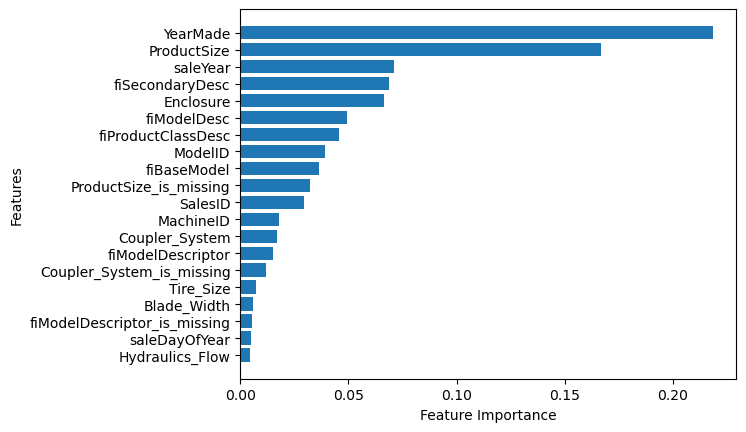

In [165]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [166]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


**Question to Finish:** Why might knowing the feature importances of a trained machine learning model be helpful?

**Final Challenge:** What other ML Models would you try on our dataset?

CatBoost.ai & XGBoost.ai?

<img src="https://scikit-learn.org/1.3/_static/ml_map.png"> 